# Bike Share Case Study

**Problem Statement**
<p> <t>A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. </p> 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 
    
The company wants to know:
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands
* Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

**Business Goal**:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

**Model Building**

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


**Model Evaluation**:

When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

* from sklearn.metrics import r2score 
* r2score(ytest, ypred)

where ytest is the test data set for the target variable, and ypred is the variable containing the predicted values of the target variable on the test set.
Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

In [221]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#from sklearn.metrics import r2score

sns.set_style("darkgrid")
%matplotlib inline

In [222]:
day = pd.read_csv(os.path.join("../data/", "day.csv")).drop("instant", axis=1)
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [223]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


## Transform Data

In [224]:
# check for missing values
day.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [225]:
# function
def yr_change(x):
    if x == 0:
        return("2018")
    elif x == 1:
        return("2019")

def season_change(x):
    if x == 1:
        return("Winter")
    elif x == 2:
        return("Spring")
    elif x == 3:
        return("Summer")
    elif x == 4:
        return("Fall")

In [226]:
# change categorical value
day["yr"] = day["yr"].apply(lambda x: yr_change(x))

day["season"] = day["season"].apply(lambda x: season_change(x))

day["mnth"] = day["mnth"].apply(lambda x: datetime.datetime.strptime(str(x), "%m").strftime("%B"))

day["weekday"] = day["weekday"].apply(lambda x: datetime.datetime.strptime(str(x+1), "%d").strftime("%A"))

In [227]:
# set data type into categorical instead of numerical
day["holiday"] = day["holiday"].astype("category")

day["workingday"] = day["workingday"].astype("category")

day["weathersit"] = day["weathersit"].astype("category")

In [228]:
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,Winter,2018,January,0,Tuesday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,Winter,2018,January,0,Wednesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,Winter,2018,January,0,Thursday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,Winter,2018,January,0,Friday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,Winter,2018,January,0,Saturday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Exploratory Data Analysis

In [229]:
# summary statistics of numerical variables
day[["temp","atemp","hum","windspeed","casual","registered","cnt"]].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028FB45A63D0>,
      dtype=object)

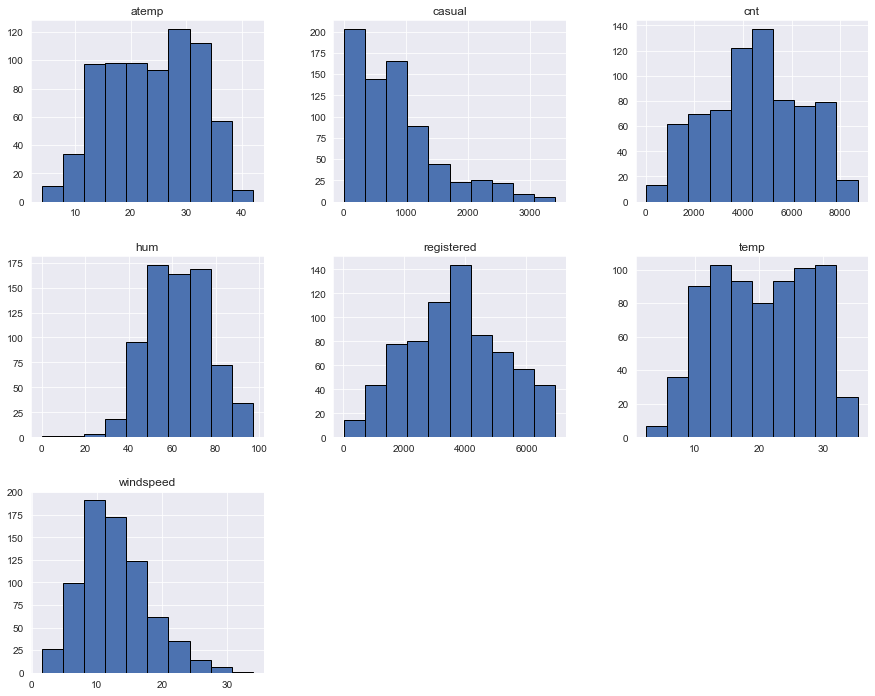

In [230]:
# quick visualize
day[["temp","atemp","hum","windspeed","casual","registered","cnt"]].hist(figsize=(15,12), edgecolor="black")

Pretty solid distribution for each variables. Needs to be standardized before doing the regression analysis.

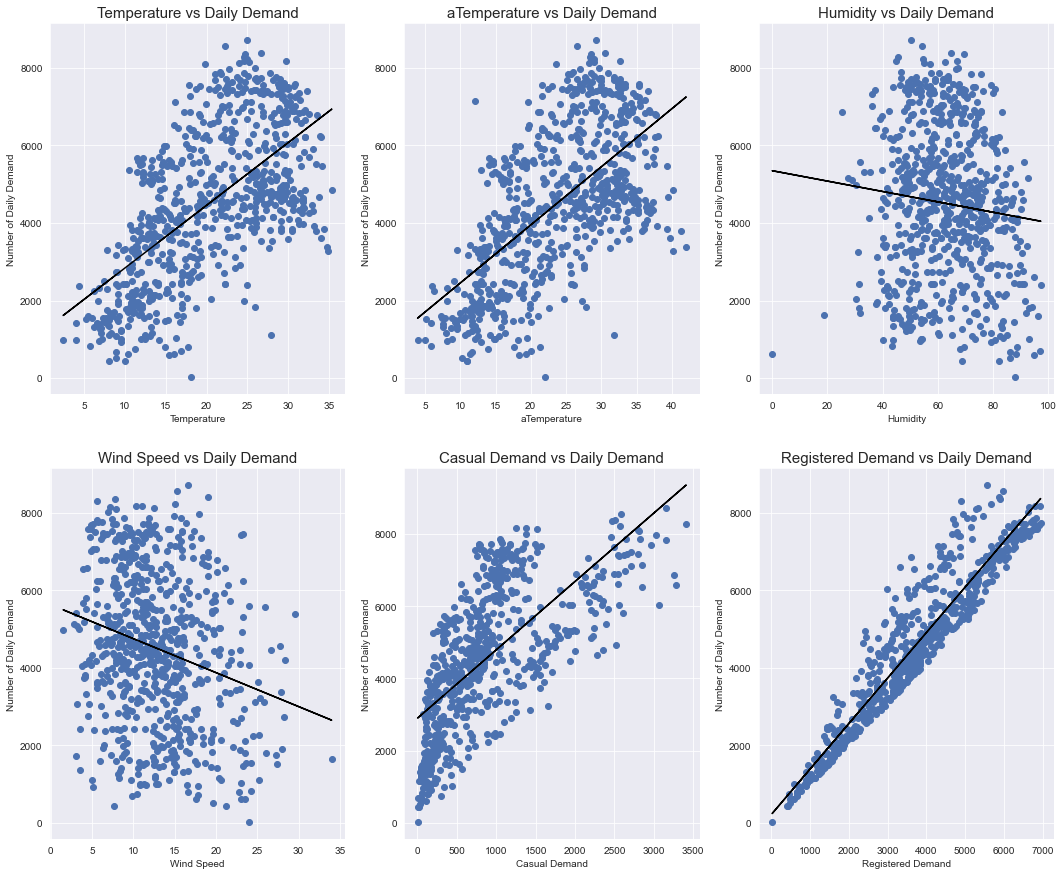

In [231]:
# visualizing the relationship between numerical variables and the target variable "cnt"
sns.set_palette("deep")
fig, ax = plt.subplots(figsize=(18,15), nrows=2, ncols=3)

ax[0,0].scatter(x="temp", y="cnt", data=day)
ax[0,0].set_title("Temperature vs Daily Demand", fontsize=15)
ax[0,0].set(xlabel="Temperature", ylabel="Number of Daily Demand")
z = np.polyfit(day["temp"], day["cnt"], 1)
p = np.poly1d(z)
ax[0,0].plot(day["temp"],p(day["temp"]), color="black")

ax[0,1].scatter(x="atemp", y="cnt", data=day)
ax[0,1].set_title("aTemperature vs Daily Demand", fontsize=15)
ax[0,1].set(xlabel="aTemperature", ylabel="Number of Daily Demand")
z = np.polyfit(day["atemp"], day["cnt"], 1)
p = np.poly1d(z)
ax[0,1].plot(day["atemp"],p(day["atemp"]), color="black")

ax[0,2].scatter(x="hum", y="cnt", data=day)
ax[0,2].set_title("Humidity vs Daily Demand", fontsize=15)
ax[0,2].set(xlabel="Humidity", ylabel="Number of Daily Demand")
z = np.polyfit(day["hum"], day["cnt"], 1)
p = np.poly1d(z)
ax[0,2].plot(day["hum"],p(day["hum"]), color="black")

ax[1,0].scatter(x="windspeed", y="cnt", data=day)
ax[1,0].set_title("Wind Speed vs Daily Demand", fontsize=15)
ax[1,0].set(xlabel="Wind Speed", ylabel="Number of Daily Demand")
z = np.polyfit(day["windspeed"], day["cnt"], 1)
p = np.poly1d(z)
ax[1,0].plot(day["windspeed"],p(day["windspeed"]), color="black")

ax[1,1].scatter(x="casual", y="cnt", data=day)
ax[1,1].set_title("Casual Demand vs Daily Demand", fontsize=15)
ax[1,1].set(xlabel="Casual Demand", ylabel="Number of Daily Demand")
z = np.polyfit(day["casual"], day["cnt"], 1)
p = np.poly1d(z)
ax[1,1].plot(day["casual"],p(day["casual"]), color="black")

ax[1,2].scatter(x="registered", y="cnt", data=day)
ax[1,2].set_title("Registered Demand vs Daily Demand", fontsize=15)
ax[1,2].set(xlabel="Registered Demand", ylabel="Number of Daily Demand")
z = np.polyfit(day["registered"], day["cnt"], 1)
p = np.poly1d(z)
ax[1,2].plot(day["registered"],p(day["registered"]), color="black")

## Trends
* Temperature, aTemperature, Casual Demand, and Registered Demand all have a strong positive correlation with daily demand.
    * As Temperature increases, so does the demand of bike. aTemperature is similar to Temperature. I might consider dropping one of the other.
    * There's nothing interesting with casual demand and registered demand since the target variables is just the two of them summed together.
* Humidity and Wind Speed are negatively correlated with daily bike demand.
    * The relationship is not as strong for humidity.
    * For Wind Speed, we have a quite strong negative correlation, might be worth taking it into account.

Text(0.5, 1.0, 'Correlation Matrix Heatmap for Numerical Features')

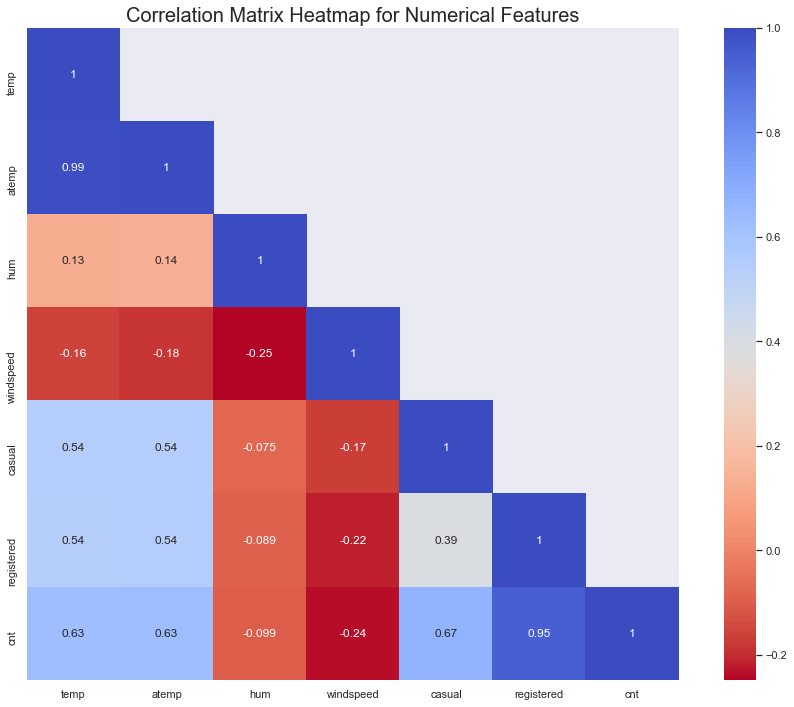

In [311]:
# correlation matrix for numerical variable
correlation_matrix = day[["temp","atemp","hum","windspeed","casual","registered","cnt"]].corr()

mask = np.array(correlation_matrix)
mask[np.tril_indices_from(mask)] = False

sns.set(rc={"figure.figsize":(16,12)})
fig, ax = plt.subplots()
ax = sns.heatmap(correlation_matrix, annot=True, square=True, cmap= "coolwarm_r", mask=mask)
ax.set_title("Correlation Matrix Heatmap for Numerical Features", fontsize=20)

## Correlation Analysis
* From the looks of it, we can probably exclude hum since it has only little correlation to cnt.
* atemp and temp has very strong correlation, we have to remove one of the other to prevent multicollinearity in the model.

In [232]:
# grouping by categorical value
# .sum() to aggregate the total value of daily demand
by_season = day.groupby(["season"])["cnt"].sum()
by_year = day.groupby(["yr"])["cnt"].sum()
by_month = day.groupby(["mnth"])["cnt"].sum()
by_holiday = day.groupby(["holiday"])["cnt"].sum()
by_day = day.groupby(["weekday"])["cnt"].sum()
by_workday = day.groupby(["workingday"])["cnt"].sum()
by_weather = day.groupby(["weathersit"])["cnt"].sum()

[Text(0, 0, 'Friday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Saturday'),
 Text(3, 0, 'Sunday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Tuesday'),
 Text(6, 0, 'Wednesday')]

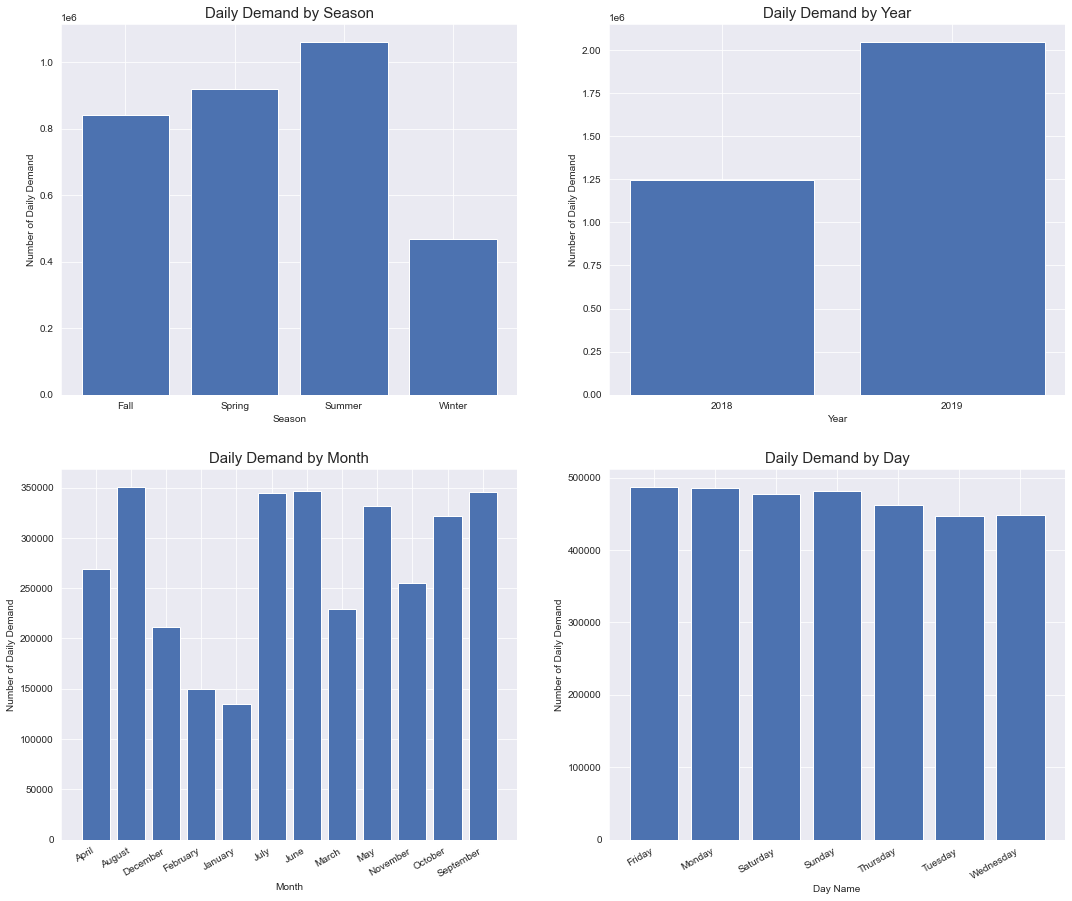

In [233]:
# visualizing relationship between categorical variables and the target variable "cnt"
fig, ax = plt.subplots(figsize=(18,15), nrows=2, ncols=2)

ax[0,0].bar(x=by_season.index, height=by_season)
ax[0,0].set_title("Daily Demand by Season", fontsize=15)
ax[0,0].set(xlabel="Season", ylabel="Number of Daily Demand")

ax[0,1].bar(x=by_year.index, height=by_year)
ax[0,1].set_title("Daily Demand by Year", fontsize=15)
ax[0,1].set(xlabel="Year", ylabel="Number of Daily Demand")

month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
ax[1,0].bar(x=by_month.index, height=by_month)
ax[1,0].set_title("Daily Demand by Month", fontsize=15)
ax[1,0].set(xlabel="Month", ylabel="Number of Daily Demand")
plt.draw()
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=30, horizontalalignment='right')

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax[1,1].bar(x=by_day.index, height=by_day)
ax[1,1].set_title("Daily Demand by Day", fontsize=15)
ax[1,1].set(xlabel="Day Name", ylabel="Number of Daily Demand")
plt.draw()
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=30, horizontalalignment='right')

## Observations
* People are less likely to use bike services during Winter season (January, February, March).
* There's an increasing trend of bike usage from 2018 to 2019 (cannot really extract useful insights for the business other than increasing brand awareness).
* People tend to use bike sharing services during summer (June, July, August).


[Text(0, 0.5, 'Number of Daily Demand'), Text(0.5, 0, 'Weather')]

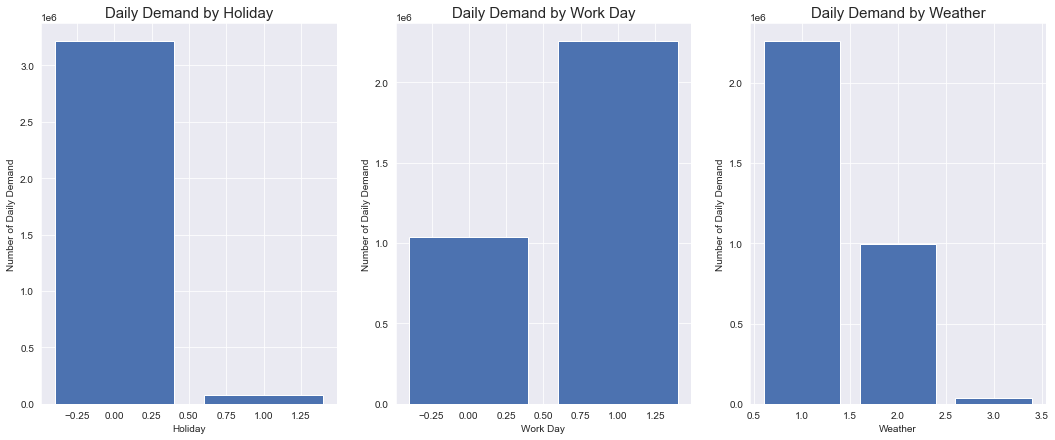

In [234]:
fig, ax = plt.subplots(figsize=(18,7), ncols=3)

ax[0].bar(x=by_holiday.index, height=by_holiday)
ax[0].set_title("Daily Demand by Holiday", fontsize=15)
ax[0].set(xlabel="Holiday", ylabel="Number of Daily Demand")

ax[1].bar(x=by_workday.index, height=by_workday)
ax[1].set_title("Daily Demand by Work Day", fontsize=15)
ax[1].set(xlabel="Work Day", ylabel="Number of Daily Demand")

ax[2].bar(x=by_weather.index, height=by_weather)
ax[2].set_title("Daily Demand by Weather", fontsize=15)
ax[2].set(xlabel="Weather", ylabel="Number of Daily Demand")

## Observations
* People are more likely to use bike during work day (probably use it to go to work).
    * Confirmed by the surge in demand for non-holiday days. People use bike more during non-holiday period.
* Unfortunately the data does not tell the differences between the weather (1,2,3) but I'm guessing 1:Sunny, 2:foggy/cloudy, 3:rain.

In [205]:
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,Winter,2018,January,0,Tuesday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,Winter,2018,January,0,Wednesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,Winter,2018,January,0,Thursday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,Winter,2018,January,0,Friday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,Winter,2018,January,0,Saturday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [235]:
day[['dteday','cnt']]

,dteday,cnt
0,01-01-2018,985
1,02-01-2018,801
2,03-01-2018,1349
3,04-01-2018,1562
4,05-01-2018,1600
...,...,...
725,27-12-2019,2114
726,28-12-2019,3095
727,29-12-2019,1341
728,30-12-2019,1796


## Data Pre-processing
* First, we are going to one-hot encode the categorical variables (exclude binary variables) to eliminate numerical relationship for each variables (2>1, 3>2, etc.)
    * Season
    * Month
    * Weekday
    * Weather Situation
* We also need to normalize the numerical variables.
    * temp
    * hum
    * windspeed
* Might consider removing **atemp** from the analysis since it's redundant to **temp**.
* Remove casual and registered since it's basically the number breakdown of our target variable.
    * While removing them in our analysis, I'd like to add the ratio between registered and total demand to be added to our analysis
        * registered/cnt as registered user ratio during the day

In [194]:
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,Winter,2018,January,0,Tuesday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,Winter,2018,January,0,Wednesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,Winter,2018,January,0,Thursday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,Winter,2018,January,0,Friday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,Winter,2018,January,0,Saturday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [250]:
day_process = day.copy()

In [251]:
# add user ratio = casual/registered
day_process["user_ratio"] = round(day_process["casual"]/day_process["registered"], 3)

In [253]:
# drop unecessary columns
day_process = day_process.drop(["dteday", "yr", "casual", "registered"], axis=1)

In [255]:
day_process.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,user_ratio
0,Winter,January,0,Tuesday,1,2,14.110847,18.18125,80.5833,10.749882,985,0.506
1,Winter,January,0,Wednesday,1,2,14.902598,17.68695,69.6087,16.652113,801,0.196
2,Winter,January,0,Thursday,1,1,8.050924,9.47025,43.7273,16.636703,1349,0.098
3,Winter,January,0,Friday,1,1,8.200000,10.60610,59.0435,10.739832,1562,0.074
4,Winter,January,0,Saturday,1,1,9.305237,11.46350,43.6957,12.522300,1600,0.054


In [322]:
# predictor and target variables
X = (day_process.drop(["cnt", "atemp"], axis=1)).values
y = np.log1p(day_process["cnt"].values) # return natural log of cnt

In [323]:
# one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [0,1,3,5])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

### Splitting Train And Test Data

In [324]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [325]:
# 20% observations for test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 32)
(146, 32)
(584,)
(146,)


In [326]:
# standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:,-5:] = sc.fit_transform(X_train[:,-5:])
X_test[:,-5:] = sc.transform(X_test[:,-5:])

### Linear Regression

In [327]:
from sklearn.linear_model import LinearRegression

# initialize model
regressor = LinearRegression()

# train the model
regressor.fit(X_train, y_train)

LinearRegression()

In [328]:
# predict test results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))

[[7.09 7.91]
 [8.47 8.27]
 [8.95 8.27]
 [8.7  8.92]
 [8.71 8.79]
 [8.27 8.61]
 [8.58 8.71]
 [8.28 8.43]
 [8.23 8.65]
 [8.46 8.37]
 [8.22 8.12]
 [7.84 7.59]
 [7.22 6.71]
 [8.63 8.34]
 [8.71 9.  ]
 [8.43 8.46]
 [8.83 8.62]
 [8.35 8.79]
 [8.76 8.96]
 [8.66 8.82]
 [7.82 7.52]
 [8.34 8.85]
 [8.08 7.92]
 [8.26 8.72]
 [8.68 8.51]
 [8.07 8.32]
 [8.13 8.55]
 [8.66 8.96]
 [8.42 8.88]
 [8.19 7.81]
 [7.56 6.63]
 [8.76 8.9 ]
 [8.05 7.43]
 [7.68 8.36]
 [8.87 8.74]
 [8.57 8.2 ]
 [7.38 7.26]
 [8.76 8.44]
 [7.54 8.1 ]
 [7.88 8.13]
 [8.3  8.42]
 [8.54 8.82]
 [8.26 8.17]
 [8.14 8.11]
 [8.71 8.56]
 [8.73 8.47]
 [8.24 8.55]
 [7.55 8.44]
 [7.18 7.86]
 [8.17 8.52]
 [8.26 7.62]
 [8.44 8.21]
 [7.59 8.2 ]
 [7.89 7.5 ]
 [7.46 7.77]
 [7.68 7.95]
 [7.86 7.59]
 [8.51 8.85]
 [7.69 7.89]
 [7.67 7.56]
 [8.51 8.77]
 [7.93 7.67]
 [8.52 8.53]
 [8.03 7.66]
 [7.89 8.01]
 [8.24 8.02]
 [8.6  8.43]
 [8.38 8.33]
 [7.88 7.43]
 [8.47 8.07]
 [8.7  8.89]
 [8.3  7.95]
 [8.51 8.79]
 [7.54 7.35]
 [8.56 8.92]
 [8.83 8.91]
 [8.85 8.95]

In [329]:
from sklearn import metrics

def reg_results(y_true, y_pred):
    # metrics
    mae=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('r-squared:', round(r2,4))
    print('Mean Squared Error (MSE):', round(mse,4))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(mse),4))
    print('Mean Absolute Error (MAE):', round(mae,4))

In [330]:
# regression results
reg_results(y_test, y_pred)

r-squared: 0.6302
Mean Squared Error (MSE): 0.122
Root Mean Squared Error (RMSE): 0.3493
Mean Absolute Error (MAE): 0.2925
